# Modelling

In [1]:
#conda activate tfm-electricity-prices-env
#python -m ipykernel install --user --name tfm-electricity-prices-env

In [2]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
from sklearn import metrics
import joblib
from joblib import dump, load
from pandas.plotting import register_matplotlib_converters

In [3]:
electricity_brent_weather = pd.read_csv("/home/dsc/CarpetaCompartida/TFM/electricity_brent_weather_no_outliers.csv",
                                       header= 0, dtype = str, engine= "python", sep=";", error_bad_lines= False,
                                encoding= "utf-8")
electricity_brent_weather

,Date,Total €/MWh no outliers,Energía final MWh,Mercado diario €/MWh,Mercado intradiario €/MWh,Restricciones €/MWh,Procesos OS €/MWh,Garantía potencia Pagos capacidad €/MWh,Total €/MWh original,Coste s.interrrumpibilidad,Day,Precio cierre Brent,Precio apertura Brent,Precio Máximo Brent,Precio mínimo Brent,Tmax,Tmin,Tmed,Vmax,TPrec
0,2013-05-07,52.95,711755.1,45.17,-0.3,2.29,0.59,5.2,52.95,0.0,Martes,104.4,105.4,105.94,104.0,24.372623,13.598554,19.108723,17.46993,0.54821163
1,2013-05-08,58.96,706886.06,50.05,-0.48,3.03,1.13,5.23,58.96,0.0,Miércoles,104.34,104.11,104.8,103.53,24.171618,13.924416,19.068588,16.027378,0.33500755
2,2013-05-09,57.94,712014.94,51.04,-0.41,1.34,0.76,5.2,57.94,0.0,Jueves,104.47,104.44,104.6,103.45,23.007523,13.323574,18.14288,17.443392,2.0035484
3,2013-05-10,53.64,707860.44,46.06,-0.18,1.35,1.23,5.18,53.64,0.0,Viernes,103.91,104.35,104.45,101.56,22.321642,12.264773,17.353886,17.460852,0.044820618
4,2013-05-11,53.6,623204.7,46.15,-0.29,2.4,1.23,4.11,53.6,0.0,Sábado,103.91,104.35,104.45,101.56,21.945469,10.597996,16.243876,17.480986,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3053,2021-09-26,56.1,624704.1,159.19,-0.14,2.64,1.14,0.0,162.84,0.0,Domingo,78.09,77.26,78.24,76.85,25.917536,13.975994,20.005056,14.563063,0.008497892
3054,2021-09-27,56.1,684730.1,176.13,-0.25,2.23,0.54,0.38,179.04,0.0,Lunes,79.53,78.25,79.9,78.21,26.475058,13.456256,20.09907,14.319683,0.41161045
3055,2021-09-28,56.1,683173.25,182.57,-0.11,1.79,0.74,0.39,185.38,0.0,Martes,79.09,79.4,80.75,78.1,25.37523,13.199469,19.425434,15.960168,0.025154099
3056,2021-09-29,56.1,698517.5,190.62,-0.28,3.99,1.46,0.38,196.18,0.0,Miércoles,78.64,78.25,79.4,77.5,25.286041,13.050295,19.229074,15.105579,0.16197278


In [4]:
electricity_brent_weather.set_index("Date", inplace=True)

In [5]:
#Let's converts each column to the correct data type

electricity_brent_weather['Energía final MWh'] = pd.to_numeric(electricity_brent_weather['Energía final MWh'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather['Mercado diario €/MWh'] = pd.to_numeric(electricity_brent_weather['Mercado diario €/MWh'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather['Mercado intradiario €/MWh'] = pd.to_numeric(electricity_brent_weather['Mercado intradiario €/MWh'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather['Restricciones €/MWh'] = pd.to_numeric(electricity_brent_weather['Restricciones €/MWh'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather['Procesos OS €/MWh'] = pd.to_numeric(electricity_brent_weather['Procesos OS €/MWh'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather['Garantía potencia Pagos capacidad €/MWh'] = pd.to_numeric(electricity_brent_weather['Garantía potencia Pagos capacidad €/MWh'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather['Total €/MWh no outliers'] = pd.to_numeric(electricity_brent_weather['Total €/MWh no outliers'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather['Total €/MWh original'] = pd.to_numeric(electricity_brent_weather['Total €/MWh original'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather['Coste s.interrrumpibilidad'] = pd.to_numeric(electricity_brent_weather['Coste s.interrrumpibilidad'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather['Precio cierre Brent'] = pd.to_numeric(electricity_brent_weather['Precio cierre Brent'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather['Precio apertura Brent'] = pd.to_numeric(electricity_brent_weather['Precio apertura Brent'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather['Precio Máximo Brent'] = pd.to_numeric(electricity_brent_weather['Precio Máximo Brent'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather['Precio mínimo Brent'] = pd.to_numeric(electricity_brent_weather['Precio mínimo Brent'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather["Tmax"] = pd.to_numeric(electricity_brent_weather["Tmax"], downcast="float")
electricity_brent_weather["Tmin"] = pd.to_numeric(electricity_brent_weather["Tmin"], downcast="float")
electricity_brent_weather["Tmed"] = pd.to_numeric(electricity_brent_weather["Tmed"], downcast="float")
electricity_brent_weather["Vmax"] = pd.to_numeric(electricity_brent_weather["Vmax"], downcast="float")
electricity_brent_weather["TPrec"] = pd.to_numeric(electricity_brent_weather["TPrec"], downcast="float")

In [6]:
electricity_brent_weather

,Total €/MWh no outliers,Energía final MWh,Mercado diario €/MWh,Mercado intradiario €/MWh,Restricciones €/MWh,Procesos OS €/MWh,Garantía potencia Pagos capacidad €/MWh,Total €/MWh original,Coste s.interrrumpibilidad,Day,Precio cierre Brent,Precio apertura Brent,Precio Máximo Brent,Precio mínimo Brent,Tmax,Tmin,Tmed,Vmax,TPrec
Date,,,,,,,,,,,,,,,,,,,
2013-05-07,52.950001,711755.1250,45.169998,-0.30,2.29,0.59,5.20,52.950001,0.0,Martes,104.400002,105.400002,105.940002,104.000000,24.372623,13.598554,19.108723,17.469931,0.548212
2013-05-08,58.959999,706886.0625,50.049999,-0.48,3.03,1.13,5.23,58.959999,0.0,Miércoles,104.339996,104.110001,104.800003,103.529999,24.171618,13.924416,19.068588,16.027378,0.335008
2013-05-09,57.939999,712014.9375,51.040001,-0.41,1.34,0.76,5.20,57.939999,0.0,Jueves,104.470001,104.440002,104.599998,103.449997,23.007523,13.323574,18.142879,17.443392,2.003548
2013-05-10,53.639999,707860.4375,46.060001,-0.18,1.35,1.23,5.18,53.639999,0.0,Viernes,103.910004,104.349998,104.449997,101.559998,22.321642,12.264773,17.353886,17.460852,0.044821
2013-05-11,53.599998,623204.6875,46.150002,-0.29,2.40,1.23,4.11,53.599998,0.0,Sábado,103.910004,104.349998,104.449997,101.559998,21.945469,10.597996,16.243876,17.480986,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-26,56.099998,624704.1250,159.190002,-0.14,2.64,1.14,0.00,162.839996,0.0,Domingo,78.089996,77.260002,78.239998,76.849998,25.917536,13.975994,20.005056,14.563063,0.008498
2021-09-27,56.099998,684730.1250,176.130005,-0.25,2.23,0.54,0.38,179.039993,0.0,Lunes,79.529999,78.250000,79.900002,78.209999,26.475058,13.456256,20.099070,14.319683,0.411610
2021-09-28,56.099998,683173.2500,182.570007,-0.11,1.79,0.74,0.39,185.380005,0.0,Martes,79.089996,79.400002,80.750000,78.099998,25.375231,13.199469,19.425434,15.960168,0.025154


In [7]:
#Also and most importantly, the Date index

electricity_brent_weather.index = pd.DatetimeIndex(electricity_brent_weather.index, dayfirst= True)


In [8]:
electricity_brent_weather.index.dtype

dtype('<M8[ns]')

In [9]:
electricity_brent_weather.dtypes

Total €/MWh no outliers                    float32
Energía final MWh                          float32
Mercado diario €/MWh                       float32
Mercado intradiario €/MWh                  float32
Restricciones €/MWh                        float32
Procesos OS €/MWh                          float32
Garantía potencia Pagos capacidad €/MWh    float32
Total €/MWh original                       float32
Coste s.interrrumpibilidad                 float32
Day                                         object
Precio cierre Brent                        float32
Precio apertura Brent                      float32
Precio Máximo Brent                        float32
Precio mínimo Brent                        float32
Tmax                                       float32
Tmin                                       float32
Tmed                                       float32
Vmax                                       float32
TPrec                                      float32
dtype: object

### ARIMA

Autoregressive Integrated Moving Average, or ARIMA, is a forecasting method for univariate time series data.

In statistics and econometrics, and in particular in time series analysis, an autoregressive integrated moving average (ARIMA) model is a generalization of an autoregressive moving average (ARMA) model. 

Both of these models are fitted to time series data either to better understand the data or to predict future points in the series (forecasting). 

ARIMA models are applied in some cases where data show evidence of non-stationarity in the sense of mean (but not variance/autocovariance), where an initial differencing step (corresponding to the "integrated" part of the model) can be applied one or more times to eliminate the non-stationarity of the mean function (i.e., the trend). 

When the seasonality shows in a time series, the seasonal-differencing could be applied to eliminate the seasonal component.

The parameters of the ARIMA model are defined as follows:

p: The number of lag observations included in the model, also called the lag order.

d: The number of times that the raw observations are differenced, also called the degree of differencing.

q: The size of the moving average window, also called the order of moving average.

In [10]:
#I'm going to create a DataFrame with only the variables that I'll use in the models

models_dataset = electricity_brent_weather.drop(["Day", "Coste s.interrrumpibilidad", "Mercado diario €/MWh",
                                  "Mercado intradiario €/MWh", "Restricciones €/MWh",
                                  "Procesos OS €/MWh", "Garantía potencia Pagos capacidad €/MWh",
                                                "Total €/MWh original"], axis = 1)

In [11]:
models_dataset

,Total €/MWh no outliers,Energía final MWh,Precio cierre Brent,Precio apertura Brent,Precio Máximo Brent,Precio mínimo Brent,Tmax,Tmin,Tmed,Vmax,TPrec
Date,,,,,,,,,,,
2013-05-07,52.950001,711755.1250,104.400002,105.400002,105.940002,104.000000,24.372623,13.598554,19.108723,17.469931,0.548212
2013-05-08,58.959999,706886.0625,104.339996,104.110001,104.800003,103.529999,24.171618,13.924416,19.068588,16.027378,0.335008
2013-05-09,57.939999,712014.9375,104.470001,104.440002,104.599998,103.449997,23.007523,13.323574,18.142879,17.443392,2.003548
2013-05-10,53.639999,707860.4375,103.910004,104.349998,104.449997,101.559998,22.321642,12.264773,17.353886,17.460852,0.044821
2013-05-11,53.599998,623204.6875,103.910004,104.349998,104.449997,101.559998,21.945469,10.597996,16.243876,17.480986,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2021-09-26,56.099998,624704.1250,78.089996,77.260002,78.239998,76.849998,25.917536,13.975994,20.005056,14.563063,0.008498
2021-09-27,56.099998,684730.1250,79.529999,78.250000,79.900002,78.209999,26.475058,13.456256,20.099070,14.319683,0.411610
2021-09-28,56.099998,683173.2500,79.089996,79.400002,80.750000,78.099998,25.375231,13.199469,19.425434,15.960168,0.025154


In [12]:
models_dataset.to_csv("models_dataset.csv", sep= ";", index = True)

In [13]:
#Let's have a look at the autocorrelation of a few variables
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

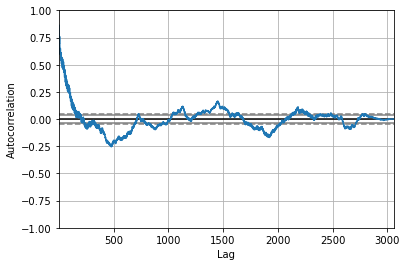

In [14]:
#There is a positive correlation aproximately in the first 250-300 lags.
autocorrelation_plot(electricity_brent_weather["Total €/MWh no outliers"])

I'm going to start with an ARIMA model, using walk-forward validation but not really estimating or accurately choosing any of the parameters of the model. This will work as a MVP.

Walk Forward Analysis does optimization on a training set; test on a period after the set and then rolls it all forward and repeats the process. We have multiple out-of-sample periods and look at these results combined.

After that, I'll check the model and will start modifying it until I think is optimal. To do this, I'll use the auto-arima function to optimise the ARIMA parameters.

I think the most important thing to notice here is that ARIMA works for univariate time series, so I will only use the electricity price to predict itself.

Also, ARIMA does not work well with seasonal data, so let's firstly check if the electricity prices are stationay or not. I will use a Dickey-Fuller test to do that.

### Checking normality in the time series / Checking Stationary in the time series - Dickey-Fuller test


Let's check if the electricity prices follow a normal distribution:

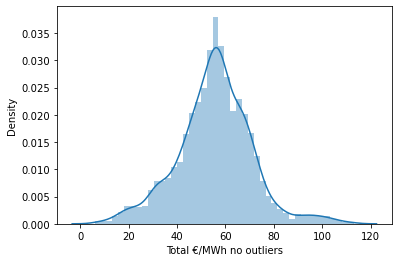

In [15]:
sns.distplot(models_dataset["Total €/MWh no outliers"]);

In [16]:
from scipy.stats import normaltest
k2, p = normaltest(models_dataset["Total €/MWh no outliers"])

alpha = 0.05
print("p = {:g}".format(p))

if p < alpha:  # null hypothesis: electricity prices comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 3.77522e-15
The null hypothesis can be rejected


Looking at the plot, it might looks like the prices follow a normal distribution, maybe with a longer right tail. However, if I test it, the electricity prices do not follow a normal distribution.

In [17]:
electricity_price = pd.DataFrame(models_dataset["Total €/MWh no outliers"])

In [18]:
electricity_price

,Total €/MWh no outliers
Date,
2013-05-07,52.950001
2013-05-08,58.959999
2013-05-09,57.939999
2013-05-10,53.639999
2013-05-11,53.599998
...,...
2021-09-26,56.099998
2021-09-27,56.099998
2021-09-28,56.099998


To test for stationarity, I'm going to use a Dickey-Fuller test:

In [19]:
from statsmodels.tsa.stattools import adfuller

y = electricity_price.values
result = adfuller(y)
print('Dickey-Fuller Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

Dickey-Fuller Statistic: -3.959491
p-value: 0.001638
Critical Values:
	1%: -3.433
	5%: -2.862
	10%: -2.567


Looking at the ADF Statistic, it is likely to reject the null hypothesis and that means the electricity prices are stationary and do not depend on time.

In this case, the null hypothesis can be rejected with a significance level of less than 1% (the Dickey-Fuller statistic is lower than the critical value at 1% treeshold). 

That means, I can use an ARIMA model to forecast the electricity prices.

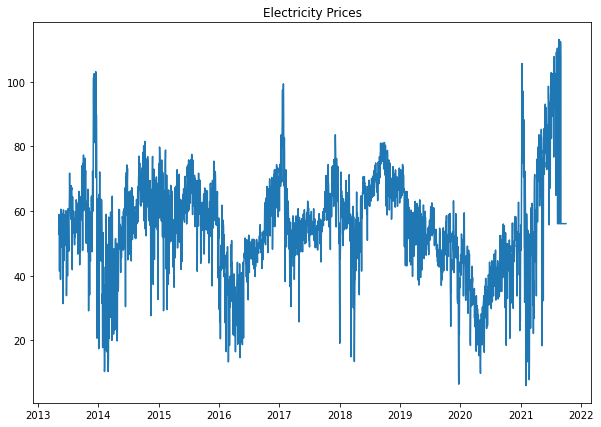

In [20]:
fig, axes = plt.subplots(figsize=(10,7))
plt.plot(electricity_price.index, electricity_price.values);
plt.title('Electricity Prices');

Let's now see if the Brent oil crude futures prices are stationary or not, just to get more information on my dataset.

In [21]:
brent_prices = models_dataset["Precio cierre Brent"]

Dickey-Fuller Statistic: -1.830950
p-value: 0.365208
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


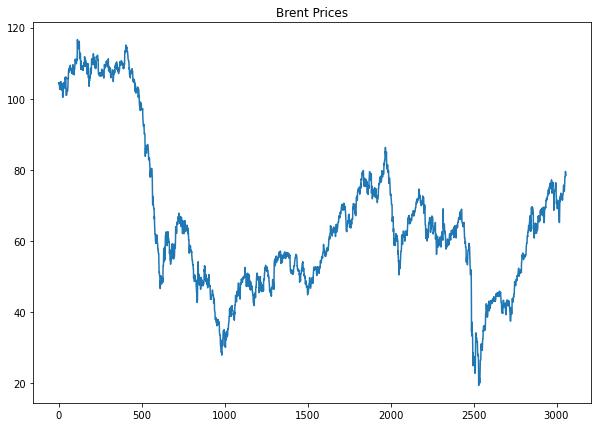

In [22]:
y = brent_prices.values
result = adfuller(y)
print('Dickey-Fuller Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
fig, axes = plt.subplots(figsize=(10,7))
plt.plot(y);
plt.title('Brent Prices');

The null hypothesis cannot be rejected and therefore, the Brent prices are not stationary. That means, they are influenced by the time.

### Walk-forward validation ARIMA

Not optimising any parameter or normalising the data (MPV):

Test RMSE: 8.015
Test MAE: 64.240


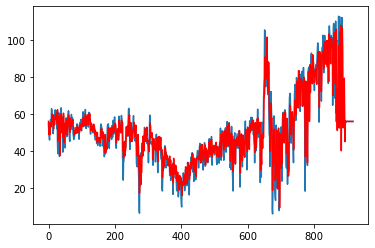

CPU times: user 33min 22s, sys: 6.29 s, total: 33min 28s
Wall time: 50min 27s


In [23]:
%%time
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# splitting into train and test sets

y = electricity_price.values

size = int(len(y) * 0.70) #Train size will be 70% of the dataset

train, test = y[0:size], y[size:len(y)]

history = [y for y in train]

predictions = list()

# walk-forward validation

for t in range(len(test)):
    model = ARIMA(history, order=(10,0,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    
# evaluate forecasts
rmse = mean_squared_error(test, predictions, squared= False)
mae = mean_squared_error(test, predictions)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)

#plotting forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()


Looking at the plot above, it looks like the model is working quite well. This is also supported by a RMSE of 8.015
, which means the predictions can vary in a bit more than 8 euros from reality. Looking at the distribution of residuals below, I can see they're around 0, and the mean of residuals is almost 0. 

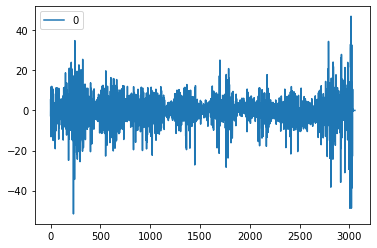

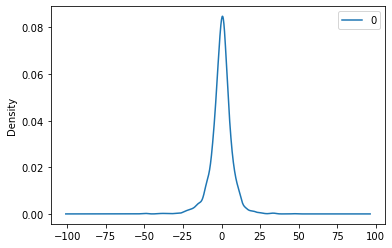

                 0
count  3057.000000
mean      0.000751
std       6.908729
min     -51.612783
25%      -2.963928
50%       0.351309
75%       3.348767
max      47.030734


In [24]:
# line plot of residuals

residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

# density plot of residuals

residuals.plot(kind='kde')
plt.show()

# summary stats of residuals

print(residuals.describe())

In [25]:
from statsmodels.tsa.arima_model import ARIMAResults

#I'm going to save this model so I can load it at any other poin on time if needed

model_fit.save("ARIMA2021nooutliers.pkl")

#To load the model, I would need to use the following code:

loaded_ARIMA = ARIMAResults.load("ARIMA2021nooutliers.pkl")

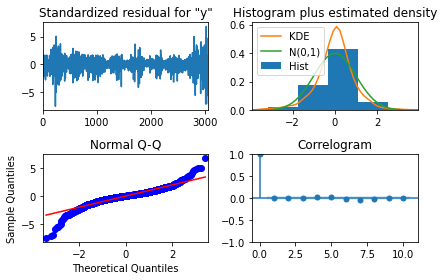

In [26]:
loaded_ARIMA.plot_diagnostics();
plt.tight_layout()

In [27]:
loaded_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3057
Model:                ARIMA(10, 0, 0)   Log Likelihood              -10246.591
Date:                Sat, 18 Dec 2021   AIC                          20517.182
Time:                        13:24:38   BIC                          20589.484
Sample:                             0   HQIC                         20543.164
                               - 3057                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         55.5388      2.300     24.143      0.000      51.030      60.048
ar.L1          0.7738      0.012     65.683      0.000       0.751       0.797
ar.L2         -0.2002      0.016    -12.644      0.000      -0.231      -0.169
ar.L3          0.1490      0.013     11.339      0.000       0.123       0.175
ar.L4          0.0152      0.016      0.976      0.329      -0.015       0.046
ar.L5          0.0148      0.016      0.919      0.358      -0.017       0.046
ar.L6          0.0610      0.015      4.035      0.000       0.031       0.091
ar.L7          0.3500      0.014     24.404      0.000       0.322       0.378
ar.L8         -0.2316      0.015    -15.076      0.000      -0.262      -0.201
ar.L9          0.0230      0.015      1.491      0.136      -0.007       0.053
ar.L10        -0.0122      0.010     -1.205      0.228      -0.032       0.008
sigma2        47.6865      0.657     72.562      0.000      46.398      48.975
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              5794.69
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                            -0.59
Prob(H) (two-sided):                  0.98   Kurtosis:                         9.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
print('Observations: %d' % (len(y)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 3058
Training Observations: 2140
Testing Observations: 918


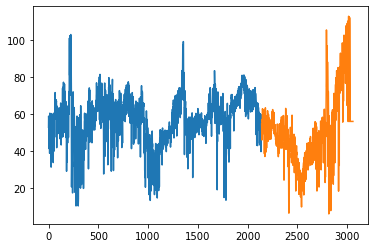

In [29]:
#This show us in a plot the 3058 observations divided by train (in blue, 2140) and test (in orange, 918)
pd.plotting.register_matplotlib_converters()
plt.plot(train)
plt.plot([None for i in train] + [y for y in test])
plt.show()

In [30]:
#import sys
#print(sys.executable)
#!conda info
#!conda list

### Testing for normality - Normalisation and standarisation

In [31]:
y = electricity_price.values

size = int(len(y) * 0.70) #Train size will be 70% of the dataset

train, test = y[0:size], y[size:len(y)]

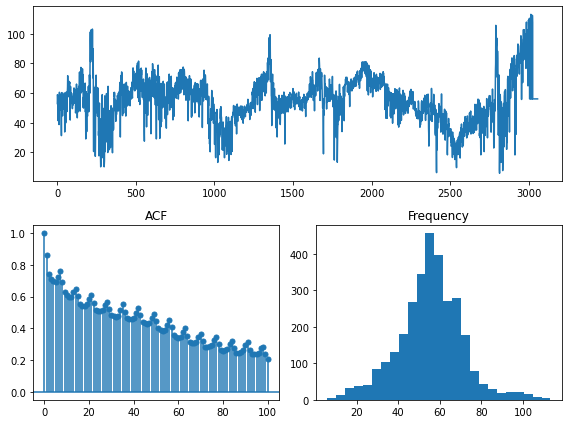

In [32]:
from pmdarima.utils import tsdisplay

tsdisplay(y, lag_max = 100)

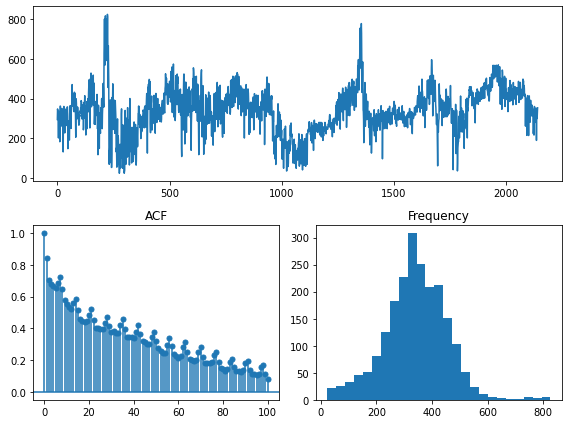

In [33]:
#Box-Cox Transformation

from pmdarima.preprocessing import BoxCoxEndogTransformer

train_bc, _ = BoxCoxEndogTransformer(lmbda2=1e-6).fit_transform(train)

tsdisplay(train_bc, lag_max= 100)

In [34]:
k2, p = normaltest(train_bc)

alpha = 0.05
print("p = {:g}".format(p))

if p < alpha:  # null hypothesis: electricity prices comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 3.04189e-13
The null hypothesis can be rejected


The Box-Cox transformation do not seem to work with my data (it does not transform it so it follows a normal distribution). Therefore, I'm going to try a MinMaxScaler from scikit-learn:

Min: 10.270000, Max: 103.209999
---------
[0.45922095]
[0.5238863]
[0.5129115]
[0.46664512]
[0.46621472]
---------
[52.949997]
[58.96]
[57.94]
[53.640003]
[53.6]


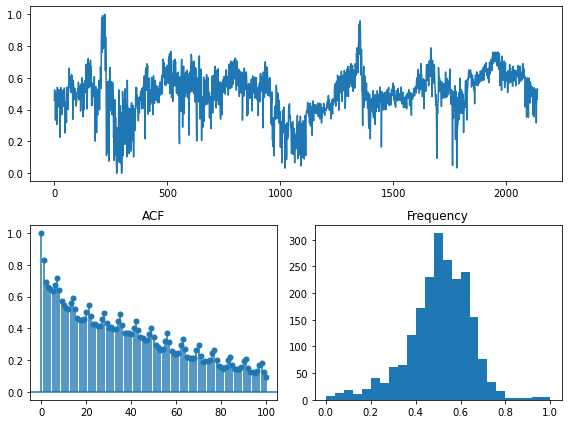

In [35]:
#Min-Max scaler

from sklearn.preprocessing import MinMaxScaler

# train the normalization

scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(train)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))

print("---------")

# normalise the train dataset and print the first 5 rows

normalised = scaler.transform(train)
for i in range(5):
    print(normalised[i])

print("---------")    
# inverse transform and print the first 5 rows

inversed = scaler.inverse_transform(normalised)
for i in range(5):
    print(inversed[i])
    
tsdisplay(normalised, lag_max= 100)

In [36]:
k2, p = normaltest(normalised)

alpha = 0.05

print(p)

if p < alpha:  # null hypothesis: electricity prices comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

[1.43149758e-33]
The null hypothesis can be rejected


The Min-Max scaler also doesn't change the distribution of my data, only the range of the values (between 0 and 1). This might be interesting when using a model with different variables that have different value ranges.

A Standar Scaler (used below) also do not seem to help to transform the electricity prices to follow a Gaussian distribution.

In [37]:
#Standard Scaler

from sklearn.preprocessing import StandardScaler

# train the standardisation

scaler = StandardScaler()
scaler = scaler.fit(train)
print('Mean: %f, Standard Deviation: %f' % (scaler.mean_, sqrt(scaler.var_)))

# standarise the train dataset and print the first 5 rows

normalised = scaler.transform(train)
for i in range(5):
    print(normalised[i])
# inverse transform and print the first 5 rows

inversed = scaler.inverse_transform(normalised)
for i in range(5):
    print(inversed[i])

Mean: 57.360322, Standard Deviation: 13.069662
[-0.3374473]
[0.12239619]
[0.04435281]
[-0.28465337]
[-0.28771394]
[52.95]
[58.96]
[57.94]
[53.64]
[53.6]


In [38]:
k2, p = normaltest(normalised)

alpha = 0.05

print(p)

if p < alpha:  # null hypothesis: electricity prices comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

[1.43154127e-33]
The null hypothesis can be rejected


In [39]:
#!conda search --channel conda-forge fitter
#pip install fitter

In [40]:
from fitter import Fitter, get_common_distributions, get_distributions

,sumsquare_error,aic,bic,kl_div
burr,0.000726,1134.123068,-46613.637049,inf
norm,0.001173,1141.111992,-45161.458217,inf
gamma,0.001230,1135.119214,-45008.640952,inf


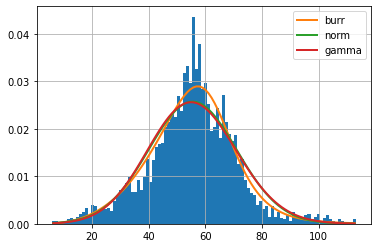

In [41]:
f = Fitter(y,distributions=["gamma","burr","norm"])
f.fit()
f.summary()

In [42]:
f.get_best(method = 'sumsquare_error')

{'burr': {'c': 10.18078777541811,
  'd': 0.3731934680857649,
  'loc': -0.20297541368486,
  'scale': 65.94655233414686}}

So it seems that electricity prices follow a Burr distribution. However, looking at the sum square error, aic and bic values from the normal distribution and comparing those to the burr distribution, and also looking at the shape of the histogram, I'm going to assume that the electricity prices are Gaussian-like for the purpose of this project.

### Checking Seasonality and Trend

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose
def decomposition_plot(ts):
    
# Apply seasonal_decompose 
    
    decomposition = seasonal_decompose(x = ts, model = "additive",
                                          period= int(len(ts)/2))
    
# Get trend, seasonality, and residuals
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

# Plotting
    plt.figure(figsize=(12,8))
    plt.subplot(411)
    plt.plot(np.log(ts), label='Original', color='blue')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend', color='red')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality', color='orange')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals', color='green')
    plt.legend(loc='best')
    plt.tight_layout()

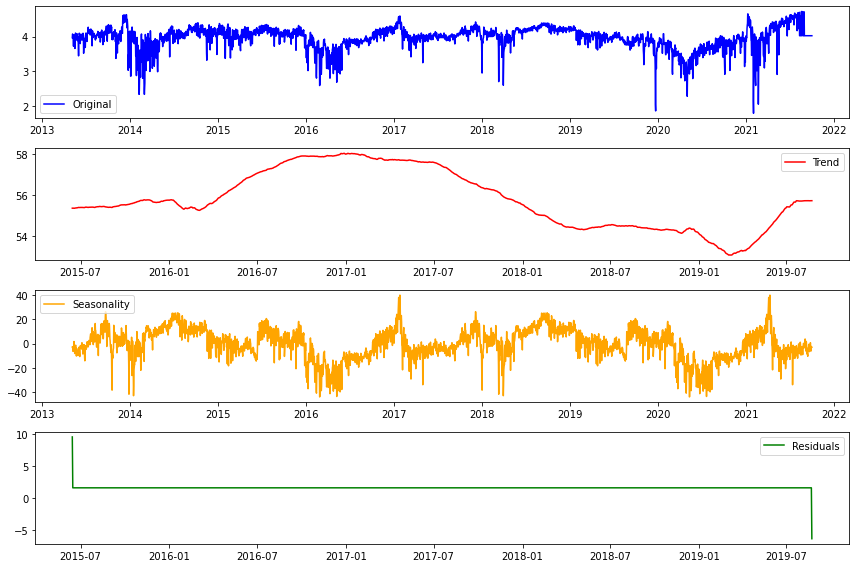

In [44]:
decomposition_plot(electricity_price)

From the plots above, it looks like the electricity prices time series might follow an increasing trend from 2019 but they don't look seasonal.

### Checking autocorrelation

In [45]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.ticker import MaxNLocator

def plot_acf_pacf(ts, figsize=(15,8),lags=1000):
    
    fig,ax = plt.subplots(nrows=3, figsize=figsize)
    
    # Plot time series
    ts.plot(ax=ax[0])
    
    # Plot acf, pavf
    plot_acf(ts, ax=ax[1], lags=lags)
    plot_pacf(ts, ax=ax[2], lags=lags) 
    fig.tight_layout()
    
    for a in ax[1:]:
        a.xaxis.set_major_locator(MaxNLocator(min_n_ticks=lags, integer=True))
        a.xaxis.grid()
    return fig,ax

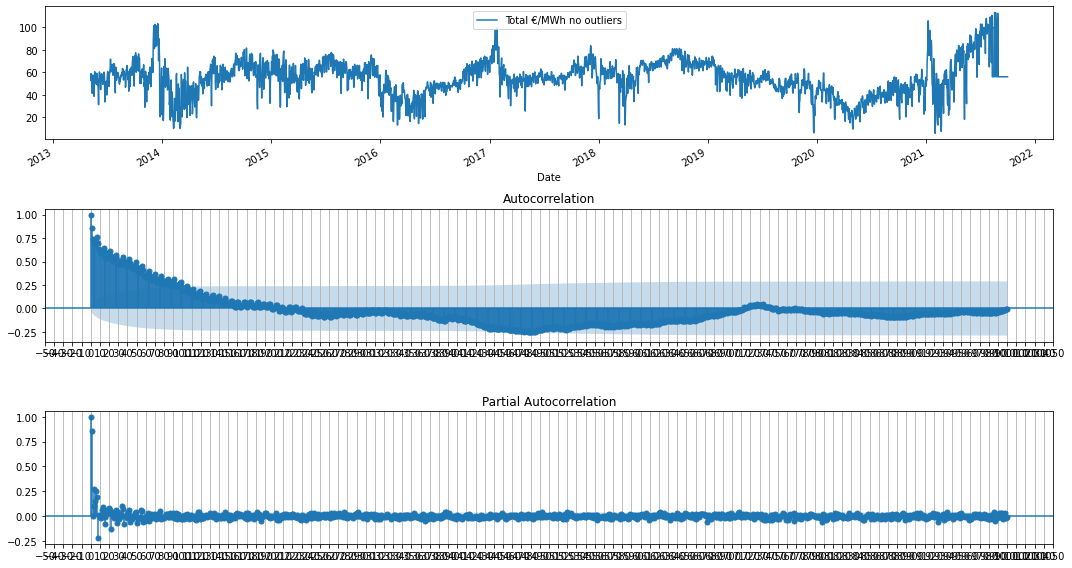

In [46]:
plot_acf_pacf(electricity_price);
plt.tight_layout()

The autocorrelation plots above also confirm that there is no seasonality in the electricity prices.

### Findings
A summary of all the findings related to electricity prices:

- They do not follow a normal distribution, but the distribution is Gaussian-like, so I will assume they are "normal".
- They are not seasonal.
- They are stationary.
- They might follow an increasing trend from 2019.

### Auto-ARIMA

Now, I'm going to improve the ARIMA model, changing its parameters so I'm using the optimal order for the model.

In [47]:
%%time
from pmdarima import auto_arima

y = electricity_price.values

model_auto_ARIMA = auto_arima(y, start_p= 1, start_q= 1, stationary= True, seasonal = False,
                             stepwise= True, error_action= "trace", suppress_warnings= True)

CPU times: user 58.9 s, sys: 140 ms, total: 59.1 s
Wall time: 1min 29s


In [48]:
model_auto_ARIMA

ARIMA(order=(5, 0, 5), scoring_args={}, suppress_warnings=True)

### Walk-forward validation ARIMA

ARIMA(order=(5, 0, 5))

Test RMSE: 8.212
Test MAE: 67.434


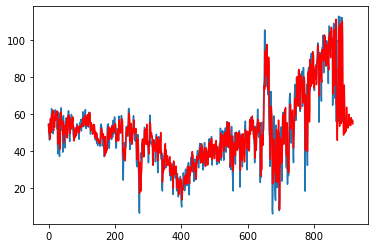

CPU times: user 1h 10min 31s, sys: 8.3 s, total: 1h 10min 40s
Wall time: 1h 17min 55s


In [49]:
%%time
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# splitting into train and test sets

y = electricity_price.values

size = int(len(y) * 0.70) #Train size will be 70% of the dataset

train, test = y[0:size], y[size:len(y)]

history = [y for y in train]

predictions = list()

# walk-forward validation

for t in range(len(test)):
    model = ARIMA(history, order=(5,0,5))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    
# evaluate forecasts

rmse = mean_squared_error(test, predictions, squared= False)
mae = mean_squared_error(test, predictions)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)

# plotting forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()


In [50]:
#I'm going to save this model so I can load it at any other poin on time if needed

model_fit.save("optimisedARIMA2021nooutliers.pkl")

#To load the model, I would need to use the following code:

#loaded_ARIMA = ARIMAResults.load("optimisedARIMA2021nooutliers.pkl")

The above ARIMA model works a bit worse than the first one, with a RMSE of 8.291 euros.

Still, I'm only using the past electricity prices to forecast.

Now, I'm going to use different models that take into account other variables of my dataset.

### Vector Auto Regression (VAR)

In a VAR model, each variable is a linear function of the past values of itself and the past values of all the other variables.

The ADF test enables one to test for cointegration between two-time series. The Johansen Test can be used to check for cointegration between a maximum of 12-time series.

I'm firstly going to delete the mean temperature from my models_dataset, because I don't think it's relevant when I also have the maximum and minumum temperature.

In [51]:
models_dataset.drop("Tmed", axis = 1, inplace= True)

In [52]:
#Checking stationarity using the Coint Johansen Test instead of ADF.

from statsmodels.tsa.vector_ar.vecm import coint_johansen

coint_johansen(models_dataset,0,1).eig

array([0.31619404, 0.28157569, 0.24554676, 0.20398709, 0.16339835,
       0.14225629, 0.11469066, 0.04558827, 0.01302474, 0.00109133])

In [53]:
from statsmodels.tsa.vector_ar.vecm import select_coint_rank
cointegration_rank = select_coint_rank(models_dataset,0,1)
print(cointegration_rank)

Johansen cointegration test using trace test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0  10          5303.          239.2
  1  10          4141.          197.4
  2  10          3131.          159.5
  3  10          2270.          125.6
  4  10          1572.          95.75
  5  10          1027.          69.82
  6  10          558.3          47.85
  7  10          186.0          29.80
  8  10          43.40          15.49
  9  10          3.337          3.841
-------------------------------------


The test statistics are higher than the critical values for all variables(series), apart from one. This means the null hypotesis can be rejected at a 95% confidence level, apart from one variable.

The null hypotesis was that the variables are not cointegrated, so rejecting the null hypotesis means that the variables (series) are cointegrated.

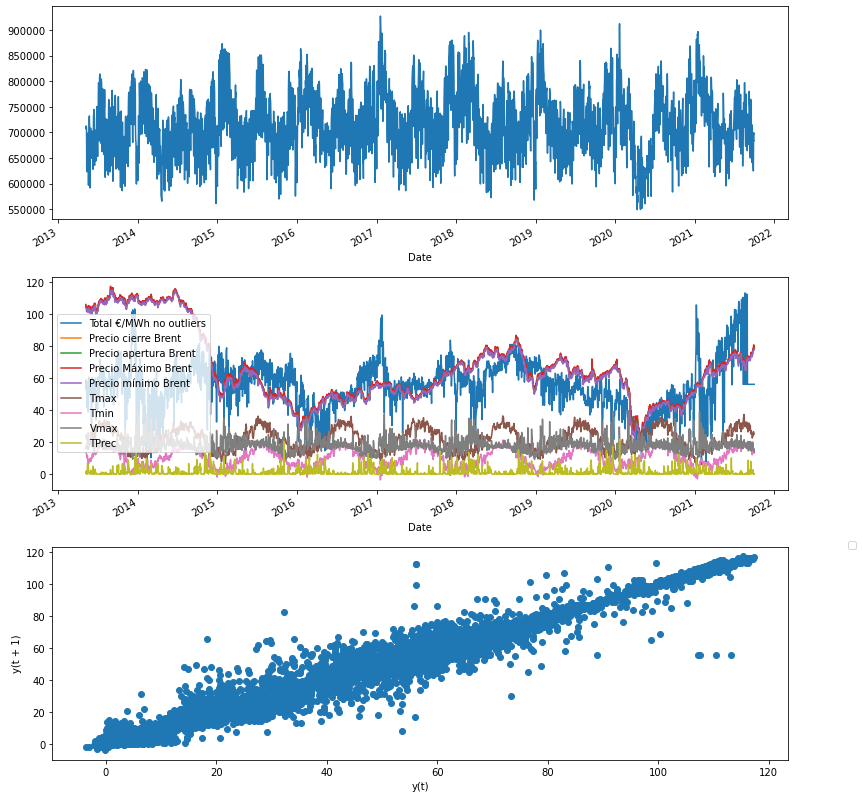

In [54]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(12,11))

#series plot

models_dataset["Energía final MWh"].plot(ax = ax1)

models_dataset.drop("Energía final MWh", axis = 1).plot(ax = ax2)

plt.legend(bbox_to_anchor=(1.1, 1.05), loc="upper right")

plt.tight_layout()

#lag plot
pd.plotting.lag_plot(models_dataset.drop("Energía final MWh", axis = 1))
plt.show()

The plot above shows some relationships among the series,showing also some outliers.

The linear shape of the lag plot indicates the presence of positive auto-correlation. 

In [55]:
#Adding the period to the index, otherwise I get a warning saying the date won't be taken into consideration when forecasting
models_dataset.index = pd.DatetimeIndex(models_dataset.index, dayfirst= True).to_period("D")

In [56]:
#creating the train and validation set

train = models_dataset[:int(0.7*(len(models_dataset)))]
test = models_dataset[int(0.7*(len(models_dataset))):]

#fitting the model

from statsmodels.tsa.vector_ar.var_model import VAR

model_VAR = VAR(endog=train)
model_fit_VAR = model_VAR.fit()

#predictions on validation

prediction_VAR = model_fit_VAR.forecast(model_fit_VAR.y, steps=len(test))
prediction_VAR

array([[5.86106015e+01, 7.51162631e+05, 6.71119698e+01, ...,
        4.51013728e+00, 1.75239131e+01, 2.31743204e-01],
       [5.80025681e+01, 7.50626418e+05, 6.71680293e+01, ...,
        5.43696266e+00, 1.78429593e+01, 5.36821298e-01],
       [5.75742162e+01, 7.49156933e+05, 6.72060233e+01, ...,
        6.06271816e+00, 1.80152379e+01, 7.99722179e-01],
       ...,
       [5.69149644e+01, 7.34598126e+05, 5.96286926e+01, ...,
        9.64365576e+00, 1.80264151e+01, 1.28447255e+00],
       [5.69147657e+01, 7.34600178e+05, 5.96242679e+01, ...,
        9.64350848e+00, 1.80263712e+01, 1.28447909e+00],
       [5.69145674e+01, 7.34602227e+05, 5.96198490e+01, ...,
        9.64336139e+00, 1.80263274e+01, 1.28448562e+00]])

The array above shows the predictions, where each list represents the predictions of each row.
Let's show this in a more understandable way:

In [57]:
#transforming the predictions into a Dataframe

cols = models_dataset.columns

pred = pd.DataFrame(index= test.index,columns=cols)

for j in range(0,10):
    for i in range(0, len(prediction_VAR)):
       pred.iloc[i][j] = prediction_VAR[i][j]

pred

,Total €/MWh no outliers,Energía final MWh,Precio cierre Brent,Precio apertura Brent,Precio Máximo Brent,Precio mínimo Brent,Tmax,Tmin,Vmax,TPrec
Date,,,,,,,,,,
2019-03-23,58.6106,751163,67.112,67.2562,67.9375,66.2288,18.5556,4.51014,17.5239,0.231743
2019-03-24,58.0026,750626,67.168,67.171,67.9632,66.2945,18.4218,5.43696,17.843,0.536821
2019-03-25,57.5742,749157,67.206,67.1792,67.9959,66.3423,18.3453,6.06272,18.0152,0.799722
2019-03-26,57.2596,747228,67.2303,67.2017,68.0229,66.3705,18.3135,6.49956,18.1084,0.997909
2019-03-27,57.0302,745238,67.2443,67.2204,68.0422,66.385,18.3135,6.81347,18.1574,1.13889
...,...,...,...,...,...,...,...,...,...,...
2021-09-26,56.9154,734594,59.6376,59.6432,60.465,58.7745,20.8669,9.64395,18.0265,1.28446
2021-09-27,56.9152,734596,59.6331,59.6387,60.4606,58.77,20.8667,9.6438,18.0265,1.28447
2021-09-28,56.915,734598,59.6287,59.6343,60.4562,58.7656,20.8666,9.64366,18.0264,1.28447


In [58]:
pred.dtypes

Total €/MWh no outliers    object
Energía final MWh          object
Precio cierre Brent        object
Precio apertura Brent      object
Precio Máximo Brent        object
Precio mínimo Brent        object
Tmax                       object
Tmin                       object
Vmax                       object
TPrec                      object
dtype: object

In [59]:
type(pred)

pandas.core.frame.DataFrame

In [61]:
#Let's converts each column to the correct data type

pred['Energía final MWh'] = pred[['Energía final MWh']].apply(pd.to_numeric, downcast="float", errors= "coerce")
pred['Total €/MWh no outliers'] = pred[['Total €/MWh no outliers']].apply(pd.to_numeric, downcast="float", errors= "coerce")
pred['Precio cierre Brent'] = pred[['Precio cierre Brent']].apply(pd.to_numeric, downcast="float", errors= "coerce")
pred['Precio apertura Brent'] = pred[['Precio apertura Brent']].apply(pd.to_numeric, downcast="float", errors= "coerce")
pred['Precio Máximo Brent'] = pred[['Precio Máximo Brent']].apply(pd.to_numeric, downcast="float", errors= "coerce")
pred['Precio mínimo Brent'] = pred[['Precio mínimo Brent']].apply(pd.to_numeric, downcast="float", errors= "coerce")
pred["Tmax"] = pred[["Tmax"]].apply(pd.to_numeric, downcast="float", errors= "coerce")
pred["Tmin"] = pred[["Tmin"]].apply(pd.to_numeric, downcast="float", errors= "coerce")
pred["Vmax"] = pred[["Vmax"]].apply(pd.to_numeric, downcast="float", errors= "coerce")
pred["TPrec"] = pred[["TPrec"]].apply(pd.to_numeric, downcast="float", errors= "coerce")

In [62]:
pred.dtypes

Total €/MWh no outliers    float32
Energía final MWh          float32
Precio cierre Brent        float32
Precio apertura Brent      float32
Precio Máximo Brent        float32
Precio mínimo Brent        float32
Tmax                       float32
Tmin                       float32
Vmax                       float32
TPrec                      float32
dtype: object

In [63]:
#Checking the Root Mean Square Error

for i in cols:
    print('RMSE for', i, 'is : ', sqrt(mean_squared_error(pred[i], test[i])))

RMSE for Total €/MWh no outliers is :  20.26327795174338
RMSE for Energía final MWh is :  65666.88492687924
RMSE for Precio cierre Brent is :  14.877495051546449
RMSE for Precio apertura Brent is :  14.78971662248596
RMSE for Precio Máximo Brent is :  14.690985602858593
RMSE for Precio mínimo Brent is :  14.924263041079648
RMSE for Tmax is :  7.016826025571999
RMSE for Tmin is :  5.451626897045043
RMSE for Vmax is :  3.9196493817221416
RMSE for TPrec is :  2.3017261164687635


In [64]:
#I'm going to save this model so I can load it at any other poin on time if needed

dump(model_fit_VAR, open("model_VAR2021nooutliers.pkl", "wb"))

#To load the model, I would need to use the following code:

VAR_loaded = load(open("model_VAR2021nooutliers.pkl", "rb"))

In [65]:
VAR_loaded.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 10, Dec, 2021
Time:                     13:50:31
--------------------------------------------------------------------
No. of Equations:         10.0000    BIC:                    23.7555
Nobs:                     2139.00    HQIC:                   23.5707
Log likelihood:          -55335.9    FPE:                1.54990e+10
AIC:                      23.4640    Det(Omega_mle):     1.47240e+10
--------------------------------------------------------------------
Results for equation Total €/MWh no outliers
                                coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------
const                             16.853795         2.406527            7.003           0.000
L1.Total €/MWh no outliers         0.891541         0.016807           53.046       

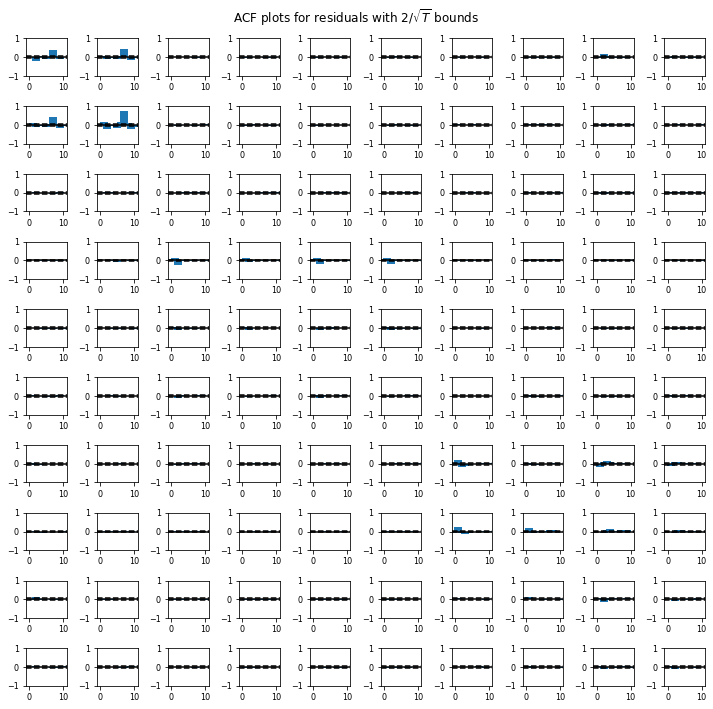

In [66]:
VAR_loaded.plot_acorr();
plt.tight_layout()

In [67]:
#This is the Final Prediction Error

VAR_loaded.fpe

15498963162.201748

In [68]:
VAR_loaded.stderr

,Total €/MWh no outliers,Energía final MWh,Precio cierre Brent,Precio apertura Brent,Precio Máximo Brent,Precio mínimo Brent,Tmax,Tmin,Vmax,TPrec
const,2.406527,15504.588667,3.295617e-01,1.829395e-01,2.325862e-01,2.474792e-01,5.189060e-01,3.969628e-01,1.000685,6.165215e-01
L1.Total €/MWh no outliers,0.016807,108.283421,2.301646e-03,1.277642e-03,1.624373e-03,1.728385e-03,3.624018e-03,2.772372e-03,0.006989,4.305761e-03
L1.Energía final MWh,0.000003,0.018922,4.022092e-07,2.232660e-07,2.838567e-07,3.020327e-07,6.332919e-07,4.844679e-07,0.000001,7.524254e-07
L1.Precio cierre Brent,0.374064,2409.992181,5.122620e-02,2.843562e-02,3.615258e-02,3.846751e-02,8.065737e-02,6.170284e-02,0.155544,9.583047e-02
L1.Precio apertura Brent,0.359508,2316.211454,4.923282e-02,2.732910e-02,3.474577e-02,3.697061e-02,7.751873e-02,5.930178e-02,0.149491,9.210139e-02
L1.Precio Máximo Brent,0.396694,2555.787145,5.432518e-02,3.015587e-02,3.833967e-02,4.079464e-02,8.553682e-02,6.543562e-02,0.164954,1.016278e-01
L1.Precio mínimo Brent,0.396672,2555.649163,5.432225e-02,3.015424e-02,3.833760e-02,4.079244e-02,8.553220e-02,6.543209e-02,0.164945,1.016223e-01
L1.Tmax,0.086768,559.020273,1.188240e-02,6.595910e-03,8.385931e-03,8.922899e-03,1.870923e-02,1.431255e-02,0.036080,2.222878e-02
L1.Tmin,0.101728,655.405631,1.393114e-02,7.733165e-03,9.831819e-03,1.046137e-02,2.193505e-02,1.678030e-02,0.042301,2.606142e-02
L1.Vmax,0.058592,377.492550,8.023889e-03,4.454054e-03,5.662811e-03,6.025412e-03,1.263388e-02,9.664912e-03,0.024364,1.501054e-02


In [69]:
#predictions for 2 day ahead

model_VAR2021 = VAR(endog=models_dataset)
model_fit_VAR2021 = model_VAR2021.fit()
yhat = model_fit_VAR2021.forecast(model_fit_VAR2021.y, steps=2)
print(yhat)

[[5.56236268e+01 7.00215161e+05 7.84496563e+01 7.84606577e+01
  7.91821660e+01 7.76142347e+01 2.52336184e+01 1.34573755e+01
  1.52621334e+01 5.51079153e-01]
 [5.54030446e+01 7.03103372e+05 7.84016206e+01 7.84207813e+01
  7.91734562e+01 7.75668220e+01 2.53317490e+01 1.34610815e+01
  1.62492480e+01 7.52742437e-01]]


In [70]:
#transforming the predictions into a Dataframe

cols = models_dataset.columns

index = pd.date_range("2021-10-01", periods = 2, freq = "D")

forecast_VAR2021 = pd.DataFrame(index= index,columns=cols)

for j in range(0,10):
    for i in range(0, len(yhat)):
       forecast_VAR2021.iloc[i][j] = yhat[i][j]

forecast_VAR2021

,Total €/MWh no outliers,Energía final MWh,Precio cierre Brent,Precio apertura Brent,Precio Máximo Brent,Precio mínimo Brent,Tmax,Tmin,Vmax,TPrec
2021-10-01,55.6236,700215,78.4497,78.4607,79.1822,77.6142,25.2336,13.4574,15.2621,0.551079
2021-10-02,55.403,703103,78.4016,78.4208,79.1735,77.5668,25.3317,13.4611,16.2492,0.752742


Let's now compare this forecast with that it actually happened in the first 2 days of October of 2021:

### 1st of Oct:
![title](Precio1oct.png)

### 2nd of Oct:
![title](Precio2oct.png)

In [71]:
historical_brent = pd.read_csv("/home/dsc/CarpetaCompartida/TFM/historic_brent_prices.csv", dtype= str, sep= ";",
                               usecols= ["Date", "Último", "Apertura", "Máximo", "Mínimo"])

historical_brent["Date"] = pd.to_datetime(historical_brent["Date"], dayfirst=True)

In [72]:
days = pd.DataFrame(index = pd.date_range("2013-01-02", periods = 3196, freq = "D")).rename_axis("Date")

historical_brent_prices_allweek = pd.merge(days, historical_brent, on= "Date", indicator = True, how= "left")

#I'm going to use Friday's price for the weekend (as this is the latest price) and the previous day's price for the bank holidays
historical_brent_prices_allweek = historical_brent_prices_allweek.fillna(method= "ffill")
historical_brent_prices_allweek.set_index("Date", inplace= True)

In [73]:
historical_brent_prices_allweek.loc["2021-10-01":"2021-10-02"]

,Último,Apertura,Máximo,Mínimo,_merge
Date,,,,,
2021-10-01,"79,28","78,49","79,41","77,55",both
2021-10-02,"79,28","78,49","79,41","77,55",left_only


As a summary, I think the model is working quiet well with short-term predictions with the Brent prices, but does not work with the electricity prices after removing outliers because prices in October of 2021 are almost 4 times higher than the median of prices between 2013-2021.

Therefore, the huge increase seen in the market was not possible to predict looking at historical prices.